<a href="https://colab.research.google.com/github/Hanyan-Wu/MachineLearningLab/blob/main/BaggingBoostingandSuperLearner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ColabNotebooks/bank-additional-full.csv", sep = ";")

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [ ]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

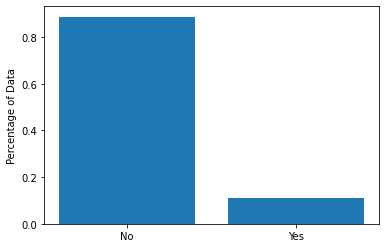

In [ ]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# resample SMOTE or oversample or undersample
## Use SMOTE to oversample data
X_scaled_SMOTE, y_train_SMOTE = SMOTE().fit_resample(X_scaled, y_train)

# Look at the number of records after oversampling using SMOTE
sorted(Counter(y_train_SMOTE['yes']).items())

[(0, 25580), (1, 25580)]

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled_SMOTE, y_train_SMOTE)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.18\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.495\ngini = 0.29\nsamples = 19563\nvalue = [16126, 3437]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.115\nsamples = 10508\nvalue = [9867, 641]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.097\nsamples = 10303\nvalue = [9776, 527]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.494\nsamples = 205\nvalue = [91, 114]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.318\ngini = 0.427\nsamples = 9055\nvalue = [6259, 2796]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.484\nsamples = 6564\nvalue = [3861, 2703]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.072\nsamples = 2491\nvalue = [2398, 93]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.419\nsamples = 31597\nvalue = [9454, 22143]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.723\ngini = 0.339\nsamples = 25997\nvalue = [5629, 20368]\nclass = 

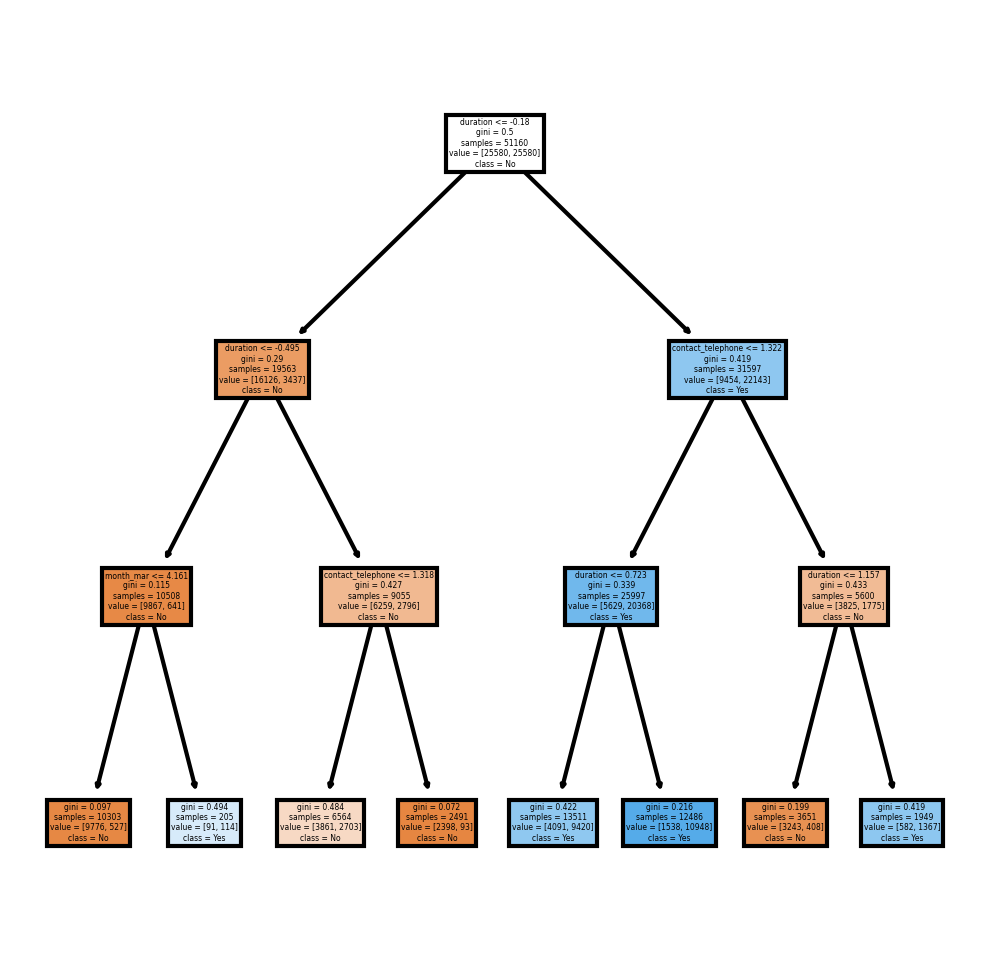

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

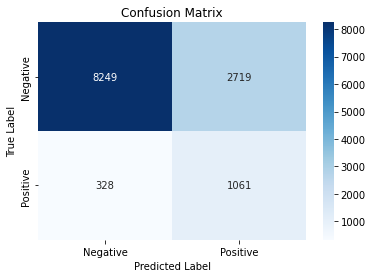

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [ ]:
# from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)

bagging.fit(X_scaled_SMOTE, y_train_SMOTE.values.ravel())

y_pred_b = bagging.predict(X_test)

accuracy_b = accuracy_score(y_test, y_pred_b)
print("Accuracy:", accuracy_b)

Accuracy: 0.7524480051792506


In [ ]:
# Confusion Matrix
cm_bag = confusion_matrix(y_true, y_pred_b)

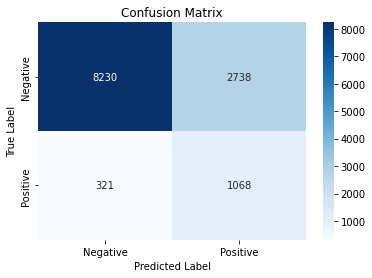

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled_SMOTE, y_train_SMOTE.values.ravel())

y_pred_boost = adaboost.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Confusion Matrix
y_pred_boost = adaboost.predict(X_test)
cm_boost = confusion_matrix(y_true, y_pred_boost)

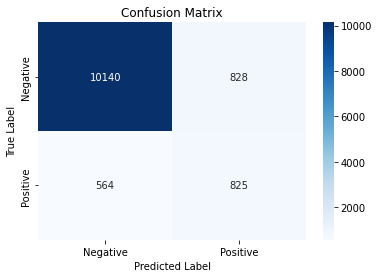

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [ ]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import 5 base learners: Logit, RandomForest, Lasso, boosting and SupportVectorMachine
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
####IMPORT MORE BASE LEARNERS####
from sklearn.linear_model import Lasso
from sklearn.svm import SVC

from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [ ]:
### SET YOUR BASE LEARNERS

base_estimators = [
    LogisticRegression(),
    RandomForestClassifier(
        n_estimators = 100,
        random_state = 42
        ),
    Lasso(),
    adaboost,
    SVC(
        C = 1.0,
        kernel = 'linear',
        random_state = 42
        )
    ]

super_learner = SuperLearner()
super_learner.add(base_estimators)

### FIT TO TRAINING DATA
super_learner.fit(X_scaled_SMOTE, y_train_SMOTE.values.ravel())

### GET base_predictions
base_predictions = super_learner.predict(X_scaled_SMOTE)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
### TRAIN YOUR METALEARNER
log_reg = LogisticRegression(fit_intercept = False).fit(base_predictions, y_train_SMOTE.values.ravel())

In [ ]:
### INTERPRET COEFFICIENTS
log_reg.coef_

array([[  1.391869  , -13.23173778,  -0.01894553,  13.1592908 ,
         -0.16111781]])

The 5 coefficients, in oreder, are the weights applied to the base predictions generated by the five base models in the SuperLearner model.

In [ ]:
print(f'The result of the Logistic base model is given a weight of {log_reg.coef_[0][0]}.')
print(f'The result of the RandomForest base model is given a weight of {log_reg.coef_[0][1]}.')
print(f'The result of the Lasso base model is given a weight of {log_reg.coef_[0][2]}.')
print(f'The result of the Boosting base model is given a weight of {log_reg.coef_[0][3]}.')
print(f'The result of the SupportVectorMachine base model is given a weight of {log_reg.coef_[0][4]}.')

The result of the Logistic base model is given a weight of 1.3918690019212374.
The result of the RandomForest base model is given a weight of -13.231737782771166.
The result of the Lasso base model is given a weight of -0.018945533206133302.
The result of the Boosting base model is given a weight of 13.159290798980322.
The result of the SupportVectorMachine base model is given a weight of -0.1611178132510612.


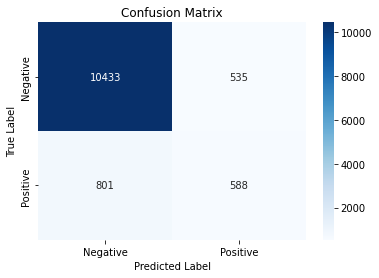

In [ ]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
base_pred_super = super_learner.predict(X_test)
y_pred_super = log_reg.predict(base_pred_super)
cm_super = confusion_matrix(y_true, y_pred_super)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_super, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create two bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and Specificities (Out of Sample)

In [ ]:
# Already out of sample just take the confusion matrix
# Calculate the Sensitivities (True Positive Rate) and Specificities (True Negative Rate)
TN_tree, FP_tree, FN_tree, TP_tree = cm_raw.ravel()
sen_tree = TP_tree / (TP_tree + FN_tree)
spe_tree = TN_tree / (TN_tree + FP_tree)

TN_bag, FP_bag, FN_bag, TP_bag = cm_bag.ravel()
sen_bag = TP_bag / (TP_bag + FN_bag)
spe_bag = TN_tree / (TN_bag + FP_bag)

TN_boost, FP_boost, FN_boost, TP_boost = cm_boost.ravel()
sen_boost = TP_boost / (TP_boost + FN_boost)
spe_boost = TN_boost / (TN_boost + FP_boost)

TN_super, FP_super, FN_super, TP_super = cm_super.ravel()
sen_super = TP_super / (TP_super + FN_super)
spe_super = TN_super / (TN_super + FP_super)

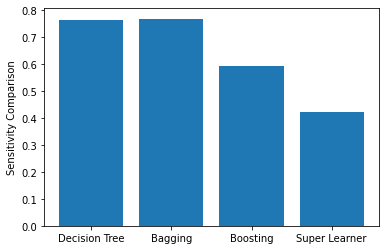

In [ ]:
# Plot the bar chart for Sensitivity comparison
model_labels = ['Decision Tree', 'Bagging', 'Boosting', 'Super Learner']
sensitivities = [sen_tree, sen_bag, sen_boost, sen_super]
specificities = [spe_tree, spe_bag, spe_boost, spe_super]

plt.bar(model_labels, sensitivities)
plt.ylabel("Sensitivity Comparison")

plt.show()

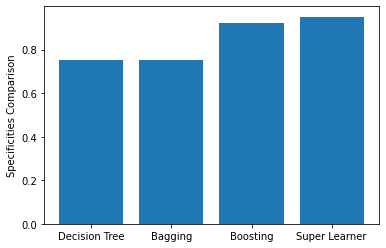

In [ ]:
# Plot the bar chart for Specificities comparison
plt.bar(model_labels, specificities)
plt.ylabel("Specificities Comparison")

plt.show()